In [1]:
# 在购物平台上选取某一商品评论进行爬虫，对爬取的文本做词频统计和词云展示，并基于snownlp库对商品评价做情感分析。

# 要求：
# 1.	爬虫至少包含10页的评论信息
# 2.	爬取的文本信息要求去除停用词，在停用词列表里可加上自定义内容
# 3.	显示情感各分数段出现频率柱状图和情感波动分析图并打印商品评价均值和中位数
# 4.	抽取自己学号最后一位数、最后第二位数、最后两位数（如，学号以39结束的同学使用第3条、第9条、第39条评论）对应的评论信息情感评分作为个例分析，查看评分是否准确
# 5.	每一步骤操作需要加上适当文字说明，或用注释写在程序里。如：
# 1 爬取了15页XX 商品的评论   代码及结果截屏: xxxx  
# 2 去除停用词   代码及结果截屏: xxxx
# 3词云展示    代码及结果截屏: xxxx
# 4我的学号为39  抽取第3/9/39条评价进行分析 代码及结果截屏: xxxx
# 结合以上案例，关于XX商品的评论情感分析准确度如何
# 6.	装订时需加上实验报告的封面，每一步操作截取相应代码结果即可，不要截显示器桌面整屏


In [2]:
import requests as re
import json

In [3]:
#设置浏览器标头
headers = {'User-Agent':'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.62',
           'Request Method':'Get',
           'callback':'fetchJSON_comment98'}

In [36]:
content= [] # 创建一个空列表，用来存放评论内容

def crawler(url):    # 定义一个爬虫函数，用来爬取网页信息
    req=re.get(url ,timeout=50,headers=headers)  # 获取网页信息
    jd=json.loads(req.text.lstrip("fetchJSON_comment98vv375(").rstrip(");"))  #先把不用的内容去掉，再用json库解析
    for i in jd['comments']:
        content.append(i['content'])
        
# 读取20页商品评论
for i in range(20):
    url=f"https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98&productId=100027006794&score=0&sortType=5&page={i}&pageSize=10&isShadowSku=0&fold=1"
    crawler(url)

In [37]:
# 保存文件
f=open('jd.txt','w',encoding='utf-8')
f.writelines(content)
f.close()

In [38]:
import jieba
from snownlp import SnowNLP
import wordcloud 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
# 导入停用词
stopwords = [line.strip() for line in open('stopwords.txt',encoding='UTF-8').readlines()]
# 在停用词列表里加上自定义内容
stopwords.extend(['\n',' ','，','。','！','？','、','：','“','”'])

In [59]:
# 打开文件
text = open('jd.txt', 'r', encoding='utf-8').read()
text

'外观设计：一米二的加长款确实比一般的踢脚线长了很多\n取暖效果：这款石墨烯的升温非常快，30平米无压力\n耗电情况：还可以接受，在同类型取暖器里算省电了\n静音效果：没有任何噪音\n安全设计：高温保护，防水，童锁一应俱全，非常好\n其他特色：独立加湿器很贴心，家里暖而不燥非常舒服外观设计：简单干净\n取暖效果：快，升温快\n静音效果：超静音\n安全设计：安全保障\n其他特色：加湿功能好外观设计：美观大气\n取暖效果：温度可调热风分档\n耗电情况：耗电少\n静音效果：根本没有任何声音\n安全设计：稳定性好 用着安全\n其他特色：加湿功能真的太棒了\n在没有暖气的日子里，房间超级温暖！值得推荐！双十一优惠购买了松下踢脚线取暖器，京东发货非常快，包装完好无损。产品外观设计漂亮，移动轻便。收到后一直试用，取暖效果很好?天气不冷放在一档24度，高于这个温度产品自动停机，低于这个温度又自动开机，天气冷了可以开二、三档，温度再调高，升温速度快，热风很舒服?配有加湿功能，调节房间湿度，还可定时，很省电呦。产品轻移动方便，白天放客厅，晚上放卧室，很好的一款取暖神器???外观设计：外观设计不错\n取暖效果：升温速度快\n静音效果：非常安静，没有燥音\n安全设计：线长1.2米，会自动断电外观设计：简约大气很好看\n取暖效果：20平米的会议室全屋都能暖起来\n耗电情况：还没统计耗电量，智能节能模式应该比较省电，感觉一小时一度电左右差不多\n静音效果：完全没有声音\n其他特色：这个加湿特别好，北方的冬天很干燥，有了这个加湿感觉好多了。机器足足一米二的长度比之前买的取暖器长了好多，取暖效果更好，推荐购买?松下的颜值真的不是吹的，白白的小小很可爱，百搭，天气还没有很冷，试了下，加热还是很快的，等天气冷了，再来测试升温多少！没有噪音，耗电量还不知道。外观设计：干净，漂亮，大气\n取暖效果：很不错，供热快\n耗电情况：省电，比空调省电，今年就用它了\n静音效果：很静音\n安全设计：安全\n其他特色：第二台了。。京东快递很棒，送的非常的快，而且送上门了，太棒了?，松下大牌子很好，石墨烯加热速度非常快，没一会就暖暖哒！机器也很长有一米二呢！\n静音效果：运行声音好小呢，听不到哎！\n安全设计：安全童锁保护，还支持倾倒断电呢，也可以洗澡的时候用，机器全身都是防水的，棒棒哒?\n其他特色：24小时定时，远

In [60]:
# 进行分词
textWord=jieba.lcut(text) 
textWord

['外观设计',
 '：',
 '一米',
 '二',
 '的',
 '加长',
 '款',
 '确实',
 '比',
 '一般',
 '的',
 '踢脚线',
 '长',
 '了',
 '很多',
 '\n',
 '取暖',
 '效果',
 '：',
 '这',
 '款',
 '石墨',
 '烯',
 '的',
 '升温',
 '非常',
 '快',
 '，',
 '30',
 '平米',
 '无',
 '压力',
 '\n',
 '耗电',
 '情况',
 '：',
 '还',
 '可以',
 '接受',
 '，',
 '在',
 '同',
 '类型',
 '取暖器',
 '里算省',
 '电',
 '了',
 '\n',
 '静音',
 '效果',
 '：',
 '没有',
 '任何',
 '噪音',
 '\n',
 '安全',
 '设计',
 '：',
 '高温',
 '保护',
 '，',
 '防水',
 '，',
 '童锁',
 '一应俱全',
 '，',
 '非常',
 '好',
 '\n',
 '其他',
 '特色',
 '：',
 '独立',
 '加湿器',
 '很',
 '贴心',
 '，',
 '家里',
 '暖',
 '而',
 '不燥',
 '非常',
 '舒服',
 '外观设计',
 '：',
 '简单',
 '干净',
 '\n',
 '取暖',
 '效果',
 '：',
 '快',
 '，',
 '升温快',
 '\n',
 '静音',
 '效果',
 '：',
 '超',
 '静音',
 '\n',
 '安全',
 '设计',
 '：',
 '安全',
 '保障',
 '\n',
 '其他',
 '特色',
 '：',
 '加湿',
 '功能',
 '好',
 '外观设计',
 '：',
 '美观',
 '大气',
 '\n',
 '取暖',
 '效果',
 '：',
 '温度',
 '可调',
 '热风',
 '分档',
 '\n',
 '耗电',
 '情况',
 '：',
 '耗电',
 '少',
 '\n',
 '静音',
 '效果',
 '：',
 '根本',
 '没有',
 '任何',
 '声音',
 '\n',
 '安全',
 '设计',
 '：',
 '稳定性',
 '好',
 ' ',
 '用',
 '着',
 '安

In [61]:
# 去除停用词
textWord = [word for word in textWord if not word in stopwords] 

In [62]:
# 创建一个字典，进行词频统计
wordCounts = {}
for word in textWord:
    if word in wordCounts:
        wordCounts[word] += 1
    else:
        wordCounts[word] = 1

In [63]:
# 词频统计结果转换成列表
item = list(wordCounts.items())
# 对词频进行排序
item.sort(key=lambda x:x[1], reverse=True)
item

[('效果', 253),
 ('取暖', 131),
 ('静音', 123),
 ('外观设计', 94),
 ('很快', 88),
 ('设计', 87),
 ('耗电', 81),
 ('声音', 73),
 ('情况', 65),
 ('升温', 52),
 ('不错', 51),
 ('温度', 47),
 ('外观', 38),
 ('加湿', 35),
 ('特色', 34),
 ('功能', 33),
 ('房间', 33),
 ('松下', 33),
 ('加热', 33),
 ('取暖器', 32),
 ('电', 32),
 ('?', 32),
 ('颜值', 28),
 ('大气', 27),
 ('好看', 27),
 ('买', 27),
 ('空调', 27),
 ('热', 27),
 ('速度', 26),
 ('干燥', 25),
 ('暖和', 25),
 ('占', 24),
 ('大方', 23),
 ('简洁', 22),
 ('踢脚线', 21),
 ('噪音', 21),
 ('感觉', 21),
 ('高', 21),
 ('品牌', 21),
 ('放在', 20),
 ('京东', 19),
 ('操作', 19),
 ('做工', 19),
 ('舒服', 18),
 ('度', 18),
 ('一点', 18),
 ('平米', 17),
 ('收到', 17),
 ('安静', 17),
 ('断电', 17),
 ('省', 17),
 ('白色', 17),
 ('地方', 17),
 ('制热', 17),
 ('开', 17),
 ('喜欢', 17),
 ('防水', 15),
 ('升温快', 15),
 ('真的', 15),
 ('产品', 15),
 ('小时', 15),
 ('满意', 15),
 ('质量', 15),
 ('物流', 15),
 ('不用', 15),
 ('接受', 14),
 ('简单', 14),
 ('值得', 14),
 ('漂亮', 14),
 ('卧室', 14),
 ('特别', 14),
 ('冬天', 14),
 ('遥控器', 14),
 ('睡觉', 14),
 (':', 14),
 ('石墨', 13),
 ('烯', 13),
 

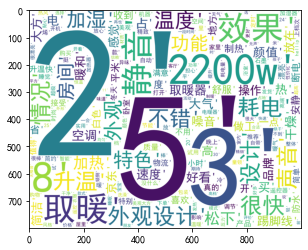

In [64]:
# 词云展示
w = wordcloud.WordCloud(
    font_path='simhei.ttf',
    background_color='white',
    width=1000,
    height=800
).generate(str(item))
plt.imshow(w)


In [65]:
# 进行情感分析
# 首先将text数据转换成列表
textList = text.split('\n')
# 删除空行
textList = [i for i in textList if i != '']
# 将列表转换成dataframe
textDf = pd.DataFrame(textList, columns=['text'])
textDf

,text
0,外观设计：一米二的加长款确实比一般的踢脚线长了很多
1,取暖效果：这款石墨烯的升温非常快，30平米无压力
2,耗电情况：还可以接受，在同类型取暖器里算省电了
3,静音效果：没有任何噪音
4,安全设计：高温保护，防水，童锁一应俱全，非常好
...,...
319,静音效果：非常安静物流非常快，别看这块头大，昨天下单今天就送到，容易装，热的快，与个头相比，...
320,取暖效果：升温很快，我家客厅有5几个平方，中央空调再加这台取暖器，特温暖。
321,静音效果：一点声音都没有，完全静音，晚上睡觉放房间绝对好。
322,京东购物真是太方便了，现在还用出门购物么？完全没有必要，京东自营下单后次日送达，多省事儿！升...


In [66]:
# 对每一条评论进行情感分析
sentiments=[] # 创建一个空列表，用来存放情感分析结果
for i in textList:
    s = SnowNLP(str(i))
    sentiments.append(s.sentiments)
textDf['sentiments']=sentiments # 将情感分析结果添加到dataframe中
textDf

,text,sentiments
0,外观设计：一米二的加长款确实比一般的踢脚线长了很多,0.990608
1,取暖效果：这款石墨烯的升温非常快，30平米无压力,0.926778
2,耗电情况：还可以接受，在同类型取暖器里算省电了,0.075616
3,静音效果：没有任何噪音,0.675853
4,安全设计：高温保护，防水，童锁一应俱全，非常好,0.819071
...,...,...
319,静音效果：非常安静物流非常快，别看这块头大，昨天下单今天就送到，容易装，热的快，与个头相比，...,0.999997
320,取暖效果：升温很快，我家客厅有5几个平方，中央空调再加这台取暖器，特温暖。,0.096327
321,静音效果：一点声音都没有，完全静音，晚上睡觉放房间绝对好。,0.350968
322,京东购物真是太方便了，现在还用出门购物么？完全没有必要，京东自营下单后次日送达，多省事儿！升...,1.000000


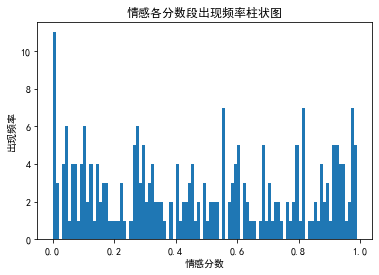

In [67]:
# 显示情感各分数段出现频率柱状图
plt.hist(textDf['sentiments'], bins=np.arange(0, 1, 0.01))
# 中文乱码的处理
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('情感分数')
plt.ylabel('出现频率')
plt.title('情感各分数段出现频率柱状图')
plt.show()


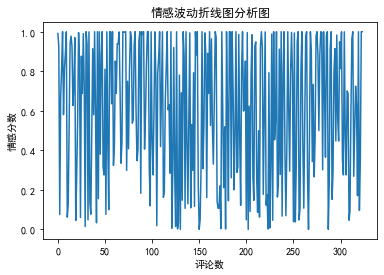

In [68]:
# 显示情感波动折线图分析图
plt.plot(textDf['sentiments'])
plt.xlabel('评论数')
plt.ylabel('情感分数')
plt.title('情感波动折线图分析图')
plt.show()

In [69]:
# 打印商品评价均值和中位数
print('商品评价均值：',textDf['sentiments'].mean())
print('商品评价中位数：',textDf['sentiments'].median())

商品评价均值： 0.6002622624111826
商品评价中位数： 0.6289175555343265


In [70]:
# 抽取自己学号最后一位数、
# 最后第二位数、
# 最后两位数对应的评论信息情感评分作为个例分析，查看评分是否准确
# 学号7055，最后一位数5，最后第二位数0，最后两位数55
print('最后一位数5的评论情感评分：',textDf['sentiments'][4])
print('最后第二位数5的评论情感评分：',textDf['sentiments'][4])
print('最后两位数55的评论情感评分：',textDf['sentiments'][54])

最后一位数5的评论情感评分： 0.8190707160657901
最后第二位数5的评论情感评分： 0.8190707160657901
最后两位数55的评论情感评分： 0.09965977045179808
